In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Replace 0s with NaNs for specific columns
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)

# Fill missing values with column median
df.fillna(df.median(), inplace=True)

In [4]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42)  # 15% of 85%

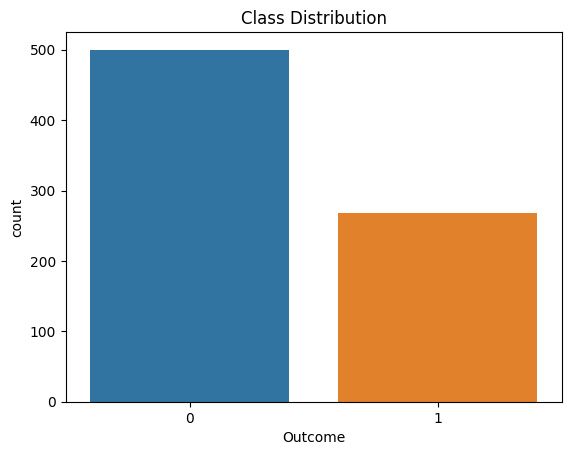

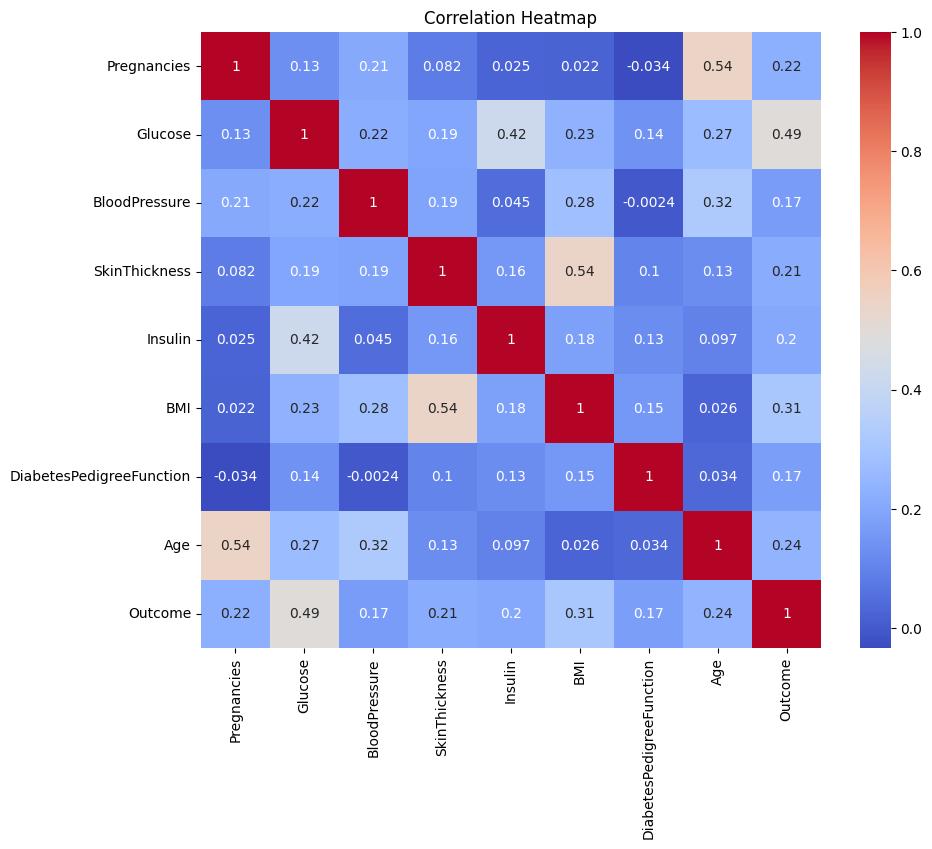

In [6]:
# Class balance
sns.countplot(x="Outcome", data=df)
plt.title("Class Distribution")
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))


Epoch 1/100
34/34 [==============================] - 2s 6ms/step - loss: 0.7267 - accuracy: 0.3873 - val_loss: 0.6587 - val_accuracy: 0.5565
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6723 - val_loss: 0.6245 - val_accuracy: 0.7304
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.7579 - val_loss: 0.5944 - val_accuracy: 0.7391
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7840 - val_loss: 0.5677 - val_accuracy: 0.7478
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7821 - val_loss: 0.5421 - val_accuracy: 0.7391
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7747 - val_loss: 0.5177 - val_accuracy: 0.7565
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7896 - val_loss: 0.4976 - val_accuracy: 0.7565
Epoch 8/100
3

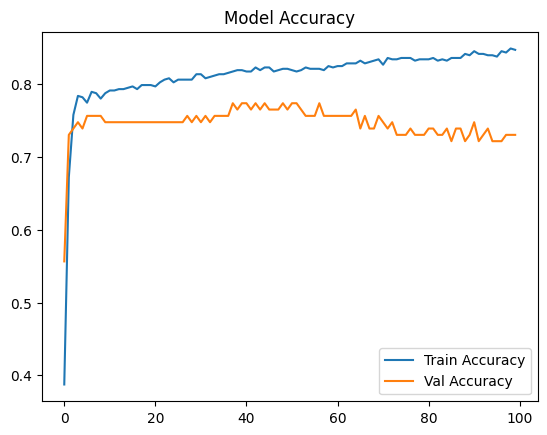

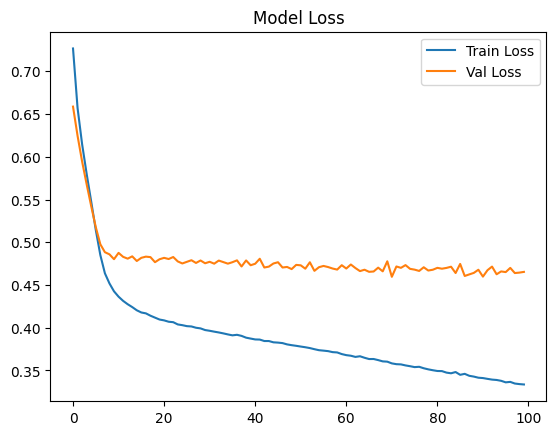

In [15]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [16]:
# Re-run hyperparameter tuning with 50 epochs
for units in [8, 16, 32]:
    model = Sequential([
        Dense(units, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(units//2, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=0)
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Units: {units}, Validation Accuracy: {val_acc:.4f}")

Units: 8, Validation Accuracy: 0.7565
Units: 16, Validation Accuracy: 0.7478
Units: 32, Validation Accuracy: 0.7217


After tunning hyperparameters selected the optimal model as [8,4] config,with 50 epochs

In [21]:
# Final model using optimal hyperparameters
model = Sequential([
    Dense(8, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/50
34/34 [==============================] - 1s 6ms/step - loss: 0.6917 - accuracy: 0.6592 - val_loss: 0.6888 - val_accuracy: 0.6261
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6648 - val_loss: 0.6569 - val_accuracy: 0.6261
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.6685 - val_loss: 0.6282 - val_accuracy: 0.6261
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.6685 - val_loss: 0.6027 - val_accuracy: 0.6348
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.6592 - val_loss: 0.5796 - val_accuracy: 0.6261
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.6667 - val_loss: 0.5636 - val_accuracy: 0.6174
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.6872 - val_loss: 0.5489 - val_accuracy: 0.6435
Epoch 8/50
34/34 [==

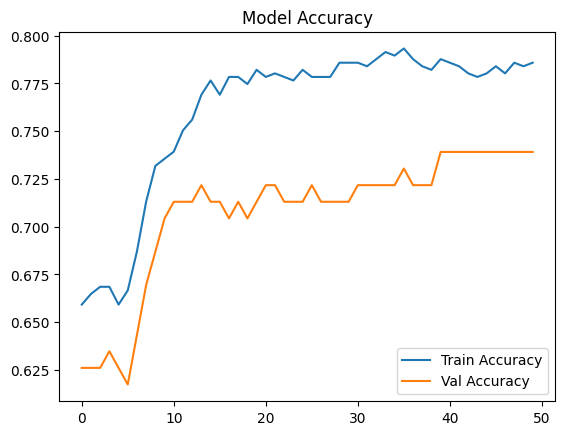

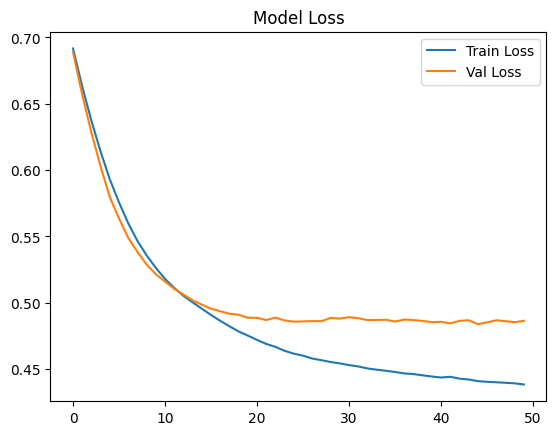

In [22]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [23]:
# Get predicted probabilities
y_pred_prob = model.predict(X_test)

# Convert to binary class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

4/4 [==============================] - 1s 6ms/step


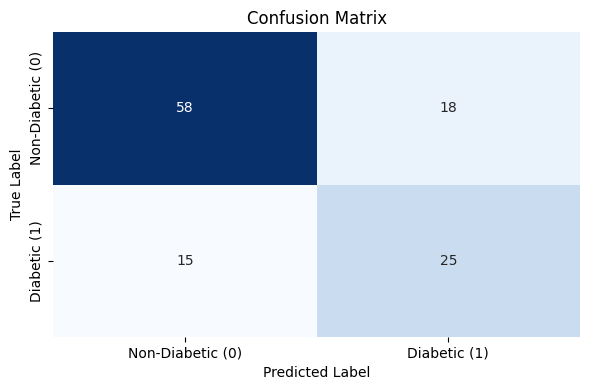

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic (0)', 'Diabetic (1)'],
            yticklabels=['Non-Diabetic (0)', 'Diabetic (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

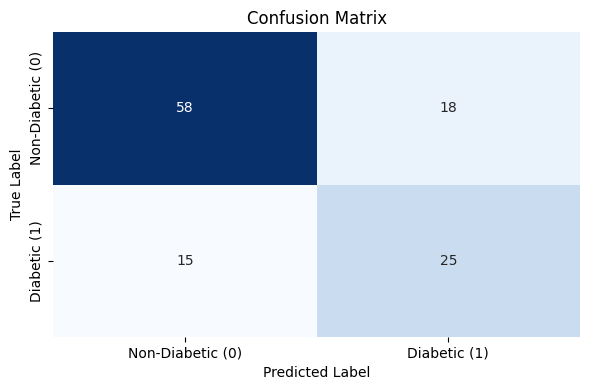

Classification Report:

                  precision    recall  f1-score   support

Non-Diabetic (0)       0.79      0.76      0.78        76
    Diabetic (1)       0.58      0.62      0.60        40

        accuracy                           0.72       116
       macro avg       0.69      0.69      0.69       116
    weighted avg       0.72      0.72      0.72       116



In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set (if not already done)
# y_pred_prob = model.predict(X_test)
# y_pred = (y_pred_prob > 0.5).astype("int32")

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names=['Non-Diabetic (0)', 'Diabetic (1)'])

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic (0)', 'Diabetic (1)'],
            yticklabels=['Non-Diabetic (0)', 'Diabetic (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Print Classification Report
print("Classification Report:\n")
print(cr)


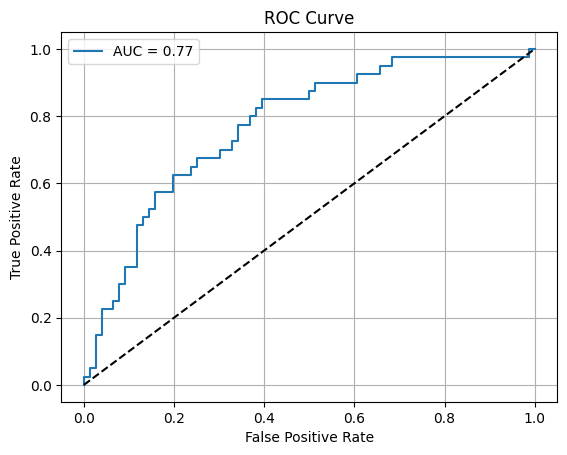

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.plot(fpr, tpr, label='AUC = %.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

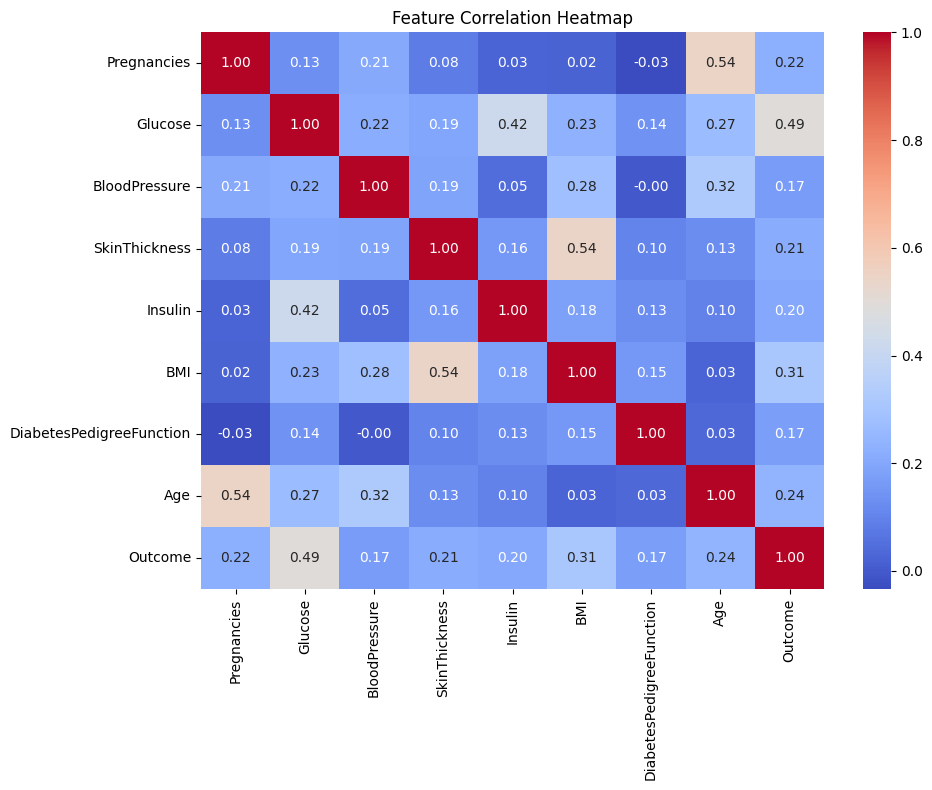

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute and plot correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Save the figure as an image
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)  # saves in current working directory
plt.show()
